<h1 align="center" style="color:brown;font-size:300%">Sparse Vector - TFIDF and cosine similarity</h1>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction

In this notebook, we are going to create TfIdfVectorizer and a documents cosine similarity calculator from scratch.

There are many ways of measuring documents seimilarity, but cosine similarity is one of the most intuitive and easy to be understood.

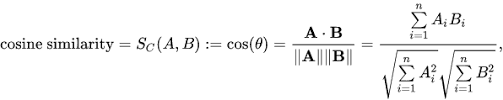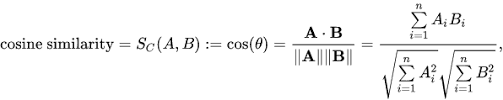



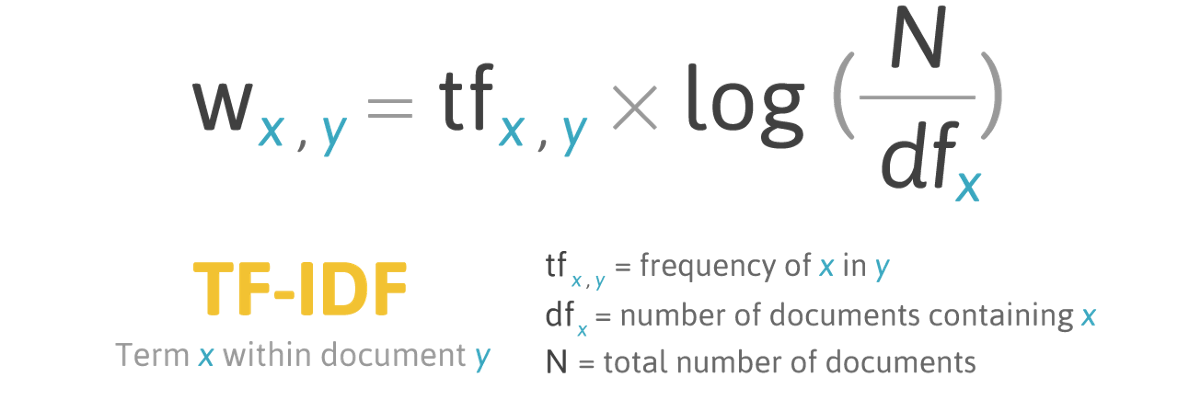

To calculate TF-IDF measure of some word in some document, we multiply the frequency of the word in the text by the logarithm of the total number of the documents divided by the number of the documents containing this word. You may ask me why we use this measure and not, for example, the ususual frequency of the word in the text. That's because TF-IDF is better in capturing the importance of the word for thid exact text.

# PT.1. TF-IDF from scratch

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

**Let's write TF first.**

In [3]:
def tf(words,word):
    return words.count(word)/len(words)       

**Now let's write IDF**

In [4]:
import math
def idf(N,total_containing):
    return math.log(N/total_containing)

**Function that will get the vocabulary of the texts corpus**

In [5]:
def get_vocabulary(texts):
    vocabulary = set()
    for text in texts:
        vocabulary.update(text)
    return list(vocabulary)

**Function that checks wether the word is in the text**

In [6]:
def is_present(word,text):
    return True if word in text else False

**Now we can write TF-IDF function itself!**

In [7]:
def tf_idf_vectorize(texts,stopwords=None,lowercase=True):
    if lowercase==True:
        texts = [text.lower() for text in texts]
    texts = [word_tokenize(text) for text in texts]
    vocabulary = get_vocabulary(texts)
    is_present_count = {}
    for text in texts:
        for word in text:
            if not word in is_present_count.keys():
                is_present_count[word] = 1
            else:
                is_present_count[word]+=1
    tf_idf_vectors = []
    for text in texts:
        tfidf_vec = []
        for word in vocabulary:
            tfidf_vec.append(tf(text,word)*idf(len(texts),is_present_count[word]))
        tf_idf_vectors.append(tfidf_vec)
    return tf_idf_vectors
print(tf_idf_vectorize(['I hate you','I love you','I have two cats','My mother has long hair']))
    

[[0.0, 0.23104906018664842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09589402415059362, 0.46209812037329684, 0.0], [0.0, 0.23104906018664842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.46209812037329684, 0.0, 0.09589402415059362, 0.0, 0.0], [0.34657359027997264, 0.0, 0.34657359027997264, 0.34657359027997264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07192051811294521, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.2772588722239781, 0.2772588722239781, 0.2772588722239781, 0.0, 0.2772588722239781, 0.0, 0.0, 0.2772588722239781]]


# Pt.2. Cosine similarity

Now that's we have a tf-idf formula, we can write a cosine function. (You can see the cosine function at the top of the notebook)

In [8]:
def cosine(x,y):
    if len(x)!=len(y):
        return "Incorrect length!"
    covariance = 0
    for i in range(len(x)):
        covariance+=x[i]*y[i]
    y_length = math.sqrt(sum([el**2 for el in y]))
    x_length = math.sqrt(sum([el**2 for el in x]))
    return covariance/(x_length*y_length)
print(cosine([1,0],[0,1]))
print(cosine([1,2],[2,4]))
print(cosine([-1,2],[2,-4]))

0.0
0.9999999999999998
-0.9999999999999998


**It is a good idea to write a function that would return a matrix of correlations between all the texts where matrix[i,j] is a cosine similarity between the text i and the text j (you can find the formula of the correlation matrix on the internet)**

In [9]:
import numpy as np
def matrix_cosine_similarity(tf_idf_vectors):
    array = np.array(tf_idf_vectors)
    covariance_mat = np.matmul(array,np.transpose(array))
    D = np.diag(1 / np.sqrt(np.diag(covariance_mat))) 
    return D@covariance_mat@D
matrix_cosine_similarity([[1,2,3],[2,3,4],[1,2,7]])

array([[1.        , 0.99258333, 0.94561086],
       [0.99258333, 1.        , 0.90971765],
       [0.94561086, 0.90971765, 1.        ]])

# PT.3. Text similarity with tf-idf and cosine

Now that's we have written functions, we can extract texts similarity!

**Let's experiment on the small group of texts!**

In [10]:
tf_idf_vectors = tf_idf_vectorize(['I hate you','I love you','I have two cats','My mother has long hair','The sunrise is beautiful','The sunrise is short',
                                  'The sunrise is at five am','There is a cat in the school'])
print(tf_idf_vectors)

[[0.46209812037329684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6931471805599452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32694308433724206, 0.0], [0.46209812037329684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6931471805599452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32694308433724206, 0.0], [0.0, 0.0, 0.5198603854199589, 0.0, 0.0, 0.0, 0.0, 0.5198603854199589, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5198603854199589, 0.0, 0.0, 0.0, 0.24520731325293155, 0.0], [0.0, 0.4158883083359672, 0.0, 0.0, 0.0, 0.0, 0.4158883083359672, 0.0, 0.4158883083359672, 0.0, 0.4158883083359672, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4158883083359672, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.17328679513998632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17328679513998632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5198603854199589, 0.0, 0.0, 0.0, 0.24520731325293155], [0.0, 0.0, 0.0, 0.0, 0.0, 0.17328679513998632, 0.0, 0.0, 0.0, 0.5198603

In [11]:
#cosine similarity between the "Sunrise is beautiful" and "The sunrise is short"
print(cosine(tf_idf_vectors[4],tf_idf_vectors[5]))
#cosine similarity between the "Sunrise is beautiful" and "The sunrise is at five am"
print(cosine(tf_idf_vectors[4],tf_idf_vectors[6]))
#cosine similarity between the "I love you" and "There is a cat in the school"
print(cosine(tf_idf_vectors[1],tf_idf_vectors[7]))
#cosine similarity between the "I love you" and "I hate you"
print(cosine(tf_idf_vectors[0],tf_idf_vectors[1]))

0.30781642815304694
0.1993449462791126
0.0
0.40009323048582257


In [12]:
print(matrix_cosine_similarity(tf_idf_vectors))

[[1.         0.40009323 0.09599311 0.         0.         0.
  0.         0.        ]
 [0.40009323 1.         0.09599311 0.         0.         0.
  0.         0.        ]
 [0.09599311 0.09599311 1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.30781643
  0.19934495 0.08090409]
 [0.         0.         0.         0.         0.30781643 1.
  0.19934495 0.08090409]
 [0.         0.         0.         0.         0.19934495 0.19934495
  1.         0.05239428]
 [0.         0.         0.         0.         0.08090409 0.08090409
  0.05239428 1.        ]]


**Now let's try to take some new sentences into account!**

In [13]:
tf_idf_vectors = tf_idf_vectorize(['I hate you','I love you','I have two cats','My mother has long hair','The sunrise is beautiful','The sunrise is short',
                                  'The sunrise is at five am','There is a cat in the school','I see you','The cat is beautiful','The sunrise is my favourite part of the day'])
print(tf_idf_vectors)

[[0.4330943280434203, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7992984242661235, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3372003038928266, 0.0], [0.4330943280434203, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7992984242661235, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3372003038928266, 0.0], [0.0, 0.0, 0.5994738181995927, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5994738181995927, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5994738181995927, 0.0, 0.0, 0.0, 0.25290022791961997, 0.0], [0.0, 0.47957905455967414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47957905455967414, 0.0, 0.34094961844768507, 0.0, 0.0, 0.47957905455967414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47957905455967414, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1129962809357643, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15153395089257887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4

In [14]:
#cosine similarity between the "Sunrise is beautiful" and "The sunrise is short"
print(cosine(tf_idf_vectors[4],tf_idf_vectors[5]))
#cosine similarity between the "Sunrise is beautiful" and "The sunrise is at five am"
print(cosine(tf_idf_vectors[4],tf_idf_vectors[6]))
#cosine similarity between the "I love you" and "There is a cat in the school"
print(cosine(tf_idf_vectors[1],tf_idf_vectors[7]))
#cosine similarity between the "I love you" and "I hate you"
print(cosine(tf_idf_vectors[0],tf_idf_vectors[1]))

0.27740260569465947
0.17318463333699244
0.0
0.32045298362141694


In [15]:
print(matrix_cosine_similarity(tf_idf_vectors))

[[1.         0.32045298 0.08229862 0.         0.         0.
  0.         0.         0.32045298 0.         0.        ]
 [0.32045298 1.         0.08229862 0.         0.         0.
  0.         0.         0.32045298 0.         0.        ]
 [0.08229862 0.08229862 1.         0.         0.         0.
  0.         0.         0.08229862 0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.10768702]
 [0.         0.         0.         0.         1.         0.27740261
  0.17318463 0.05236721 0.         0.64878481 0.1599504 ]
 [0.         0.         0.         0.         0.27740261 1.
  0.13557493 0.04099487 0.         0.0834873  0.12521471]
 [0.         0.         0.         0.         0.17318463 0.13557493
  1.         0.02559342 0.         0.05212178 0.07817253]
 [0.         0.         0.         0.         0.05236721 0.04099487
  0.02559342 1.         0.         0.26750156 0.02844163]
 [0.32045298 0.32045298 0.082298

We can see that the results have changed from what we saw before adding some new sentences. That's because TF-IDF measures depend on the number of the sentences in the corpus and their lexical makeup. We have added some new texts and these parameters changed!

# Conclusion

TF-IDF and cosine similarity can be used for calculating texts similarity and this method has both advantages and disdvantages.

The advantages are:

+ It is a simple and easy to understand method
+ It is good for measuring vocabulary similarity

The disadvanrages are:

- It doesn't measure semantic similarity. For example, in the examples above "I hate you" and "I love you" showed high level of similarity, though they have the opposite meanings
- The result is dependent on the corpus our model fit on.

Things we could do to increase the "accuracy" of the model:
 
 - Apply some standartization (stemming, lemmatization)